## Organized Plant Disease Dataset by Category and Disease Type

In [17]:
import os
import shutil
from pathlib import Path
from natsort import natsorted

# Define the root directory of the current dataset
root_dir = "/kaggle/input/project/project"

# Define the new output directory
output_dir = "/kaggle/working/organized_dataset"

# Define categories and their corresponding diseases (with spaces)
categories = {
    "Fresh_leaf": ["Fresh leaf", "Eggplant fresh leaf", "Tomato Fresh leaf"],
    "Bacterial": ["Tomato Bacterial spot", "Black Rot"],
    "Viral": ["Mosaic virus", "Tomato leaf curl virus", "Eggplant begomovirus", "Tomato spotted wilt"],
    "Fungal": ["Downey mildew", "Downy mildew", "Fusarium wilt", "Anthracnose", 
               "Eggplant Cercopora leaf spot", "Eggplant verticillium wilt", "Anthracnose lesions"]
}

# If the folder already exists, remove it and create a new one
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

# Create new category folders
for category in categories:
    Path(os.path.join(output_dir, category)).mkdir(parents=True, exist_ok=True)

# Initialize a dictionary to count images per category
image_counts = {category: 0 for category in categories}
image_counters = {category: {} for category in categories}

# Function to get category for a given folder
def get_category(folder_name):
    for category, folders in categories.items():
        if folder_name in folders:
            return category
    raise ValueError(f"Folder {folder_name} not found in any category!")

# Walk through the current dataset
for crop_folder in os.listdir(root_dir):
    crop_path = os.path.join(root_dir, crop_folder)
    if not os.path.isdir(crop_path):
        continue
    
    for disease_folder in os.listdir(crop_path):
        disease_path = os.path.join(crop_path, disease_folder)
        if not os.path.isdir(disease_path):
            continue
        
        # Determine the category for the disease
        try:
            category = get_category(disease_folder)
        except ValueError as e:
            print(e)
            continue
        
        # Initialize counter if not already done
        if disease_folder not in image_counters[category]:
            image_counters[category][disease_folder] = 1
        
        # Process each image in the disease folder (Natural Sort to maintain order)
        image_files = natsorted(os.listdir(disease_path))
        
        for image_name in image_files:
            image_path = os.path.join(disease_path, image_name)
            if not os.path.isfile(image_path):
                continue
            
            # New image name format: Crop_Disease_imgX.jpg
            new_image_name = f"{crop_folder.replace(' ', '_')}_{disease_folder.replace(' ', '_')}_img{image_counters[category][disease_folder]}.jpg"
            destination_path = os.path.join(output_dir, category, new_image_name)
            
            # Copy the image to the new location with the new name
            shutil.copy2(image_path, destination_path)
            image_counters[category][disease_folder] += 1
            image_counts[category] += 1

print("\n Dataset organization complete!")



 Dataset organization complete!


In [18]:
import os
from natsort import natsorted

# Folder path for Bacterial
folder_path = "/kaggle/working/organized_dataset/Bacterial"

image_names = natsorted(os.listdir(folder_path))
print("First_5_items of Bacterial")
for image_name in image_names[:5]:
    print(image_name)

folder_path = "/kaggle/working/organized_dataset/Fresh_leaf"

image_names = natsorted(os.listdir(folder_path))
print("last_5_items Fresh leaf") 
for image_name in image_names[-5:]:
    print(image_name)

folder_path = "/kaggle/working/organized_dataset/Fungal"

image_names = natsorted(os.listdir(folder_path))
print("Middle_5_items of Fungal")
middle_5_items = image_names[len(image_names)//2 - 2 : len(image_names)//2 + 3]
for image_name in middle_5_items:
    print(image_name)

folder_path = "/kaggle/working/organized_dataset/Viral"

image_names = natsorted(os.listdir(folder_path))
print("First_5_items of Viral")
for image_name in image_names[:5]:
    print(image_name)

First_5_items of Bacterial
Cauliflower_Black_Rot_img1.jpg
Cauliflower_Black_Rot_img2.jpg
Cauliflower_Black_Rot_img3.jpg
Cauliflower_Black_Rot_img4.jpg
Cauliflower_Black_Rot_img5.jpg
last_5_items Fresh leaf
Tomato_Tomato_Fresh_leaf_img590.jpg
Tomato_Tomato_Fresh_leaf_img591.jpg
Tomato_Tomato_Fresh_leaf_img592.jpg
Tomato_Tomato_Fresh_leaf_img593.jpg
Tomato_Tomato_Fresh_leaf_img594.jpg
Middle_5_items of Fungal
Cauliflower_Downy_mildew_img352.jpg
Cauliflower_Downy_mildew_img353.jpg
Cauliflower_Downy_mildew_img354.jpg
Cauliflower_Downy_mildew_img355.jpg
Cauliflower_Downy_mildew_img356.jpg
First_5_items of Viral
Bitter_Gourd_Mosaic_virus_img1.jpg
Bitter_Gourd_Mosaic_virus_img2.jpg
Bitter_Gourd_Mosaic_virus_img3.jpg
Bitter_Gourd_Mosaic_virus_img4.jpg
Bitter_Gourd_Mosaic_virus_img5.jpg


## Total Images and Folder-wise Distribution Overview

In [19]:
# Calculate total images
total_images = sum(image_counts.values())

# Print image counts per category
print("Image counts per category:")
for category, count in image_counts.items():
    print(f"{category}: {count} images")
print(f"\nTotal images across all categories: {total_images} images")

Image counts per category:
Fresh_leaf: 3487 images
Bacterial: 1149 images
Viral: 2729 images
Fungal: 5421 images

Total images across all categories: 12786 images


## Bar Chart Representation of Folder-wise Image Counts
Display each category with the number of images for easy comparison.


Bar chart saved as 'image_count_plot.png'


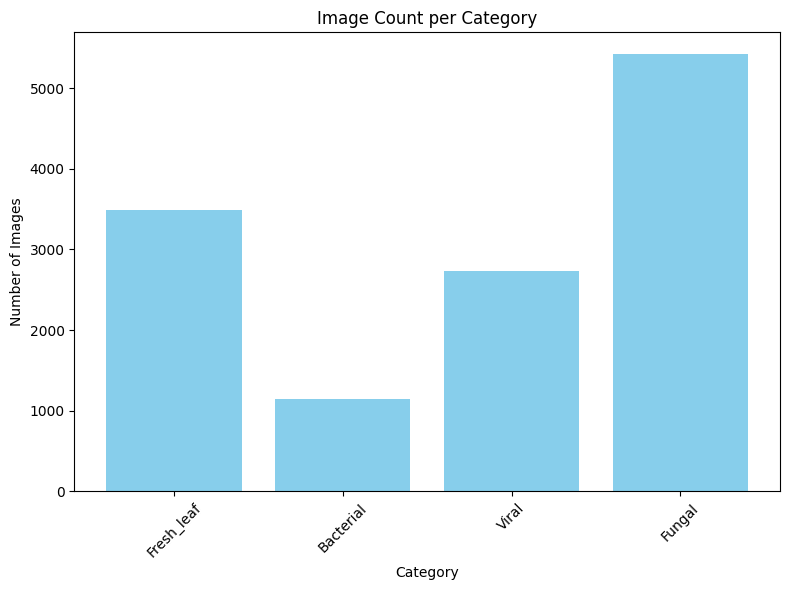

In [20]:
import matplotlib.pyplot as plt

# Create a bar chart for image counts
plt.figure(figsize=(8, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
plt.title("Image Count per Category")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig("image_count_plot.png")
print("\nBar chart saved as 'image_count_plot.png'")

In [21]:
!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git


!pip install lime

  Cloning https://github.com/jacobgil/pytorch-grad-cam.git to /tmp/pip-req-build-znb0x5_d
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/pytorch-grad-cam.git /tmp/pip-req-build-znb0x5_d
  Resolved https://github.com/jacobgil/pytorch-grad-cam.git to commit 781dbc0d16ffa95b6d18b96b7b829840a82d93d1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from lime import lime_image
import zipfile
import os
from tqdm import tqdm  # Import tqdm for progress bars

## Pre-Processing and Load the Dataset

In [23]:
# Define transformations with potential augmentations
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),      
    transforms.RandomHorizontalFlip(),     
    transforms.ToTensor(),                  
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),         
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
# Load dataset
dataset = datasets.ImageFolder(root="/kaggle/working/organized_dataset", transform=transform_train)
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
# Apply test transformation to validation and test sets

val_dataset.dataset.transform = transform_test
test_dataset.dataset.transform = transform_test

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## Data Visualization for Each Class

['Bacterial', 'Fresh_leaf', 'Fungal', 'Viral']
{'Bacterial': 0, 'Fresh_leaf': 1, 'Fungal': 2, 'Viral': 3}
4


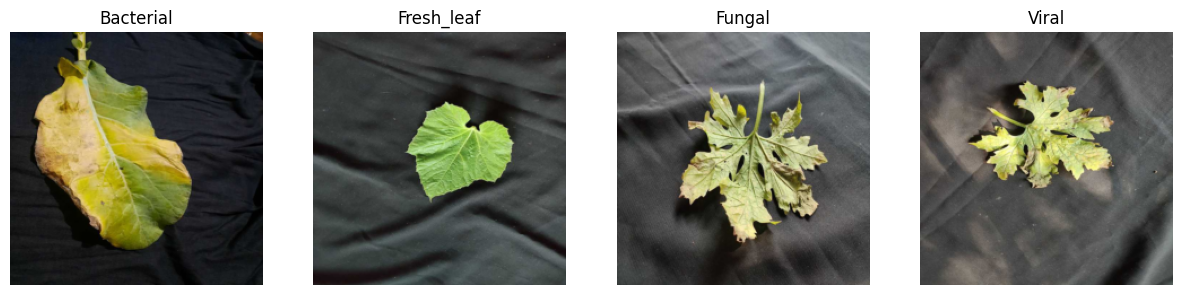

In [24]:
class_names = dataset.classes
print(class_names)
print(dataset.class_to_idx)
# Output: {'anthracnose': 0, 'downey mildew': 1, 'fresh leaf': 2}
num_classes = len(class_names)
print(num_classes)
fig, axs = plt.subplots(1, num_classes, figsize=(15, 4))
# Dictionary to track displayed images per class
displayed_classes = {class_name: False for class_name in class_names}

# Loop through the data to get at least one sample from each class
for images, labels in train_loader:
    for img, label in zip(images, labels):
        class_name = class_names[label]
        # Display the image if not already displayed for this class
        if not displayed_classes[class_name]:
            img = img.permute(1, 2, 0).numpy()
            img = (img * 0.5) + 0.5  # Unnormalize the image
            axs[label].imshow(np.clip(img, 0, 1))  # Clip to valid range
            axs[label].set_title(class_name)
            axs[label].axis('off')
            displayed_classes[class_name] = True  # Mark as displayed

        # Break if all classes are displayed
        if all(displayed_classes.values()):
            break

    if all(displayed_classes.values()):
        break
plt.show()

Class names: ['Bacterial', 'Fresh_leaf', 'Fungal', 'Viral']
Class to index: {'Bacterial': 0, 'Fresh_leaf': 1, 'Fungal': 2, 'Viral': 3}
Number of classes: 4

First 5 image paths:
/kaggle/working/organized_dataset/Bacterial/Cauliflower_Black_Rot_img1.jpg
/kaggle/working/organized_dataset/Bacterial/Cauliflower_Black_Rot_img10.jpg
/kaggle/working/organized_dataset/Bacterial/Cauliflower_Black_Rot_img100.jpg
/kaggle/working/organized_dataset/Bacterial/Cauliflower_Black_Rot_img101.jpg
/kaggle/working/organized_dataset/Bacterial/Cauliflower_Black_Rot_img102.jpg
Found type: Bacterial, Image: Cauliflower_Black_Rot_img1.jpg

Unique Bacterial types found: ['Bacterial']
Number of unique Bacterial types: 1


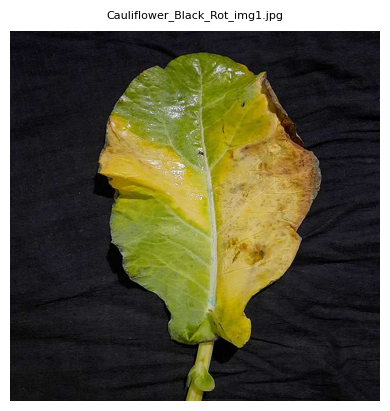

In [33]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import datasets
import textwrap

# Assuming dataset is already defined
# dataset = datasets.ImageFolder(root="/kaggle/working/organized_dataset", transform=transform_train)

# Get all image paths and their corresponding class indices
image_paths = dataset.imgs  # List of tuples (path, class_idx)

# Debug: Print first 5 image paths to verify structure
print("\nFirst 5 image paths:")
for path, _ in image_paths[:5]:
    print(path)

# Specify the target subfolder (change this to your desired subfolder)
target_subfolder = "Cauliflower_Black_Rot"  # Example: Change to "Bitter_Gourd_Black_Rot" if needed
bacterial_folder = "Bacterial"

# Collect image paths from the target subfolder
image_list = []
for img_path, class_idx in image_paths:
    # Normalize path and check if it's in the Bacterial folder and target subfolder
    normalized_path = img_path.replace("\\", "/")
    if f"/{bacterial_folder}/" in normalized_path and f"/{target_subfolder}/" in normalized_path:
        image_list.append(img_path)
        print(f"Found image in {target_subfolder}: {os.path.basename(img_path)}")

# Limit the number of images to display (e.g., max 8 for a 2x4 grid)
max_images = 8
image_list = image_list[:max_images]
num_images = len(image_list)
print(f"\nNumber of images found in {target_subfolder}: {num_images}")

# Plot images
if num_images == 0:
    print(f"No images found in {bacterial_folder}/{target_subfolder}. Check the folder name or dataset path.")
else:
    # Aim for ~2 rows: calculate columns to get close to 2 rows
    rows = min(2, num_images)  # Use 1 row if num_images <= 2, else 2
    cols = (num_images + rows - 1) // rows  # Ceiling division to fit in ~2 rows
    figsize_width = cols * 4  # 4 inches per column for larger images
    figsize_height = rows * 5  # 5 inches per row for larger images
    fig, axs = plt.subplots(rows, cols, figsize=(figsize_width, figsize_height))
    
    # Handle case when there's only one image
    if num_images == 1:
        axs = [axs]  # Convert single axes to list for consistent indexing
    else:
        axs = axs.flatten()  # Flatten for easier indexing

    # Load and display images
    for i, img_path in enumerate(image_list):
        try:
            # Load image using PIL
            img = Image.open(img_path)
            img = np.array(img) / 255.0  # Convert to numpy and normalize to [0, 1]
            
            # Display image
            axs[i].imshow(np.clip(img, 0, 1))
            # Show full filename as title, wrap if too long
            full_name = os.path.basename(img_path)
            # Wrap text to fit within ~30 characters per line
            wrapped_name = "\n".join(textwrap.wrap(full_name, width=30))
            axs[i].set_title(wrapped_name, fontsize=8, pad=10)
            axs[i].axis('off')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            axs[i].set_title(f"Error: {full_name}", fontsize=8)
            axs[i].axis('off')

    # Hide any unused subplots
    for i in range(num_images, len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()